In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox


/Users/saksham/opt/anaconda3/envs/DA_env/lib/python3.9/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [4]:
ica_df = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")
ica_df

,Unnamed: 0,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,0,central,4809,no,basic,college,2/18/11,feb,employed,m,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,...,31,1,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,...,40,2,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [5]:
numerical_df = ica_df._get_numeric_data()
numerical_df

,Unnamed: 0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,4809,48029,61,7,52,0,9,292
1,1,2228,26794,64,3,26,0,1,744
2,2,14947,22139,100,34,31,0,2,480
3,3,22332,49078,97,10,3,0,2,484
4,4,9025,23675,117,15,31,1,7,707
...,...,...,...,...,...,...,...,...,...
10684,10684,15563,64811,253,8,40,2,7,1214
10685,10685,5259,61146,65,7,68,0,6,273
10686,10686,23893,39837,201,11,63,0,2,381
10687,10687,11971,64195,158,0,27,4,6,618


In [6]:
categoricals_df = ica_df.select_dtypes('object')
categoricals_df

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


<AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>

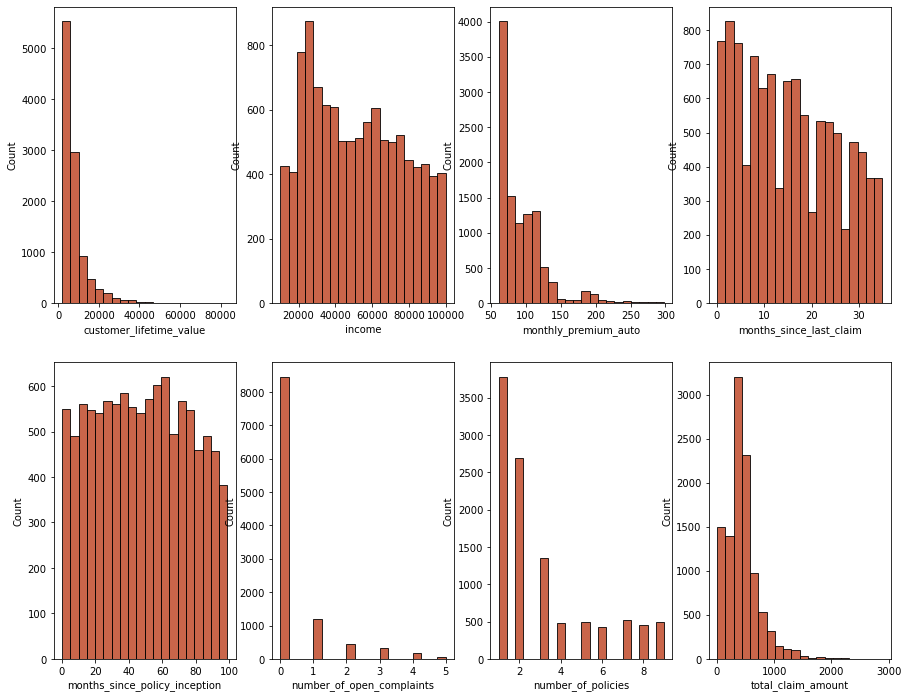

In [98]:
## Seaborn
#subplots
fig,ax=plt.subplots(2,4, figsize=(15,12), )
#actual graph
sns.histplot((numerical_df['customer_lifetime_value']), bins=20, ax=ax[0,0], color = '#b8320d')
sns.histplot((numerical_df['income']), bins=20, ax=ax[0,1], color = '#b8320d')
sns.histplot((numerical_df['monthly_premium_auto']), bins=20, ax=ax[0,2], color = '#b8320d')
sns.histplot((numerical_df['months_since_last_claim']), bins=20, ax=ax[0,3], color = '#b8320d')
sns.histplot((numerical_df['months_since_policy_inception']), bins=20, ax=ax[1,0], color = '#b8320d')
sns.histplot((numerical_df['number_of_open_complaints']), bins=20, ax=ax[1,1], color = '#b8320d')
sns.histplot((numerical_df['number_of_policies']), bins=20, ax=ax[1,2], color = '#b8320d')
sns.histplot((numerical_df['total_claim_amount']), bins=20, ax=ax[1,3], color = '#b8320d')

Text(0.5, 0.98, 'numerical_df')

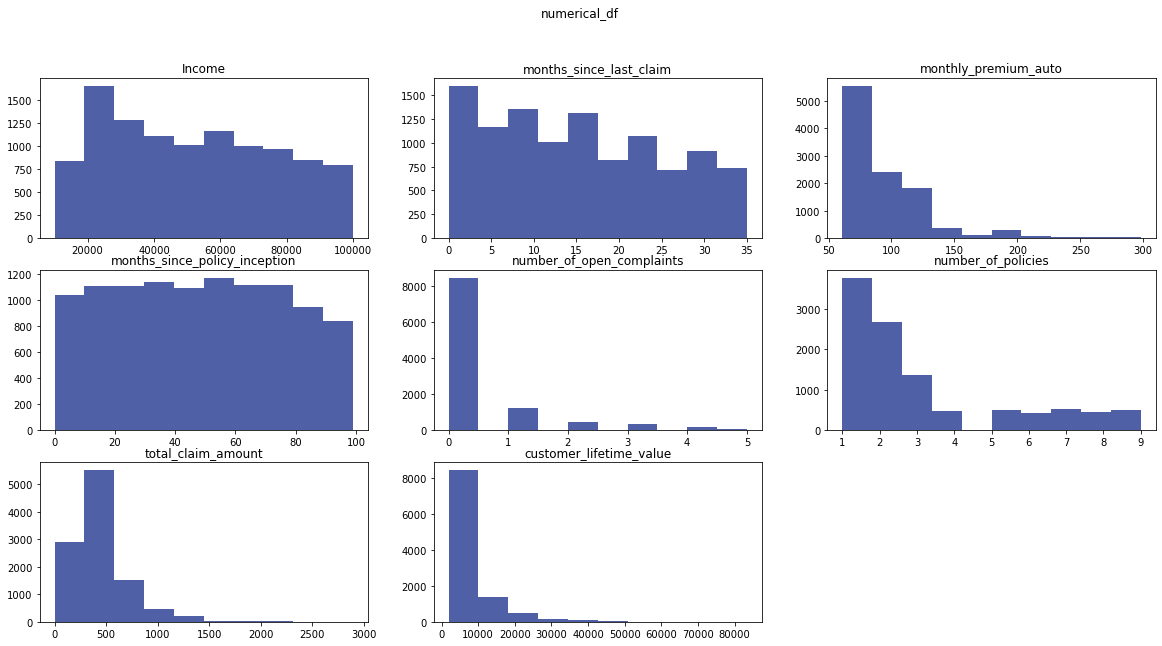

In [95]:
#resizing
plt.figure(figsize=(20,10))

#1st plot
plt.subplot(3,3,1)
plt.hist('income', data= numerical_df, color = '#5060a6')
plt.title("Income")

#2nd plot
plt.subplot(3,3,2)
plt.hist('months_since_last_claim', data= numerical_df, color = '#5060a6')
plt.title("months_since_last_claim")


#3th plot
plt.subplot(3,3,3)
plt.hist('monthly_premium_auto', data= numerical_df, color = '#5060a6')
plt.title("monthly_premium_auto")

#4th plot
plt.subplot(3,3,4)
plt.hist('months_since_policy_inception', data= numerical_df, color = '#5060a6')
plt.title("months_since_policy_inception")

#5th plot
plt.subplot(3,3,5)
plt.hist('number_of_open_complaints', data= numerical_df, color = '#5060a6')
plt.title("number_of_open_complaints")

#6th plot
plt.subplot(3,3,6)
plt.hist('number_of_policies', data= numerical_df, color = '#5060a6')
plt.title("number_of_policies")

#7th plot
plt.subplot(3,3,7)
plt.hist('total_claim_amount', data= numerical_df,color = '#5060a6')
plt.title("total_claim_amount")

#th plot
plt.subplot(3,3,8)
plt.hist('customer_lifetime_value', data= numerical_df, color = '#5060a6')
plt.title("customer_lifetime_value")



#title 
plt.suptitle("numerical_df")

No it doesn't look like normal distribution

In [54]:
X = numerical_df[['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_policy_inception', 'months_since_last_claim', 'number_of_open_complaints', 'number_of_policies']]
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

                         feature       VIF
0        customer_lifetime_value  2.822793
1                         income  4.114033
2           monthly_premium_auto  6.892773
3  months_since_policy_inception  3.386280
4        months_since_last_claim  2.855476
5      number_of_open_complaints  1.171581
6             number_of_policies  2.329221


In [10]:
responsed = ica_df['response'].value_counts()
responsed

no     9328
yes    1361
Name: response, dtype: int64

<BarContainer object of 2 artists>

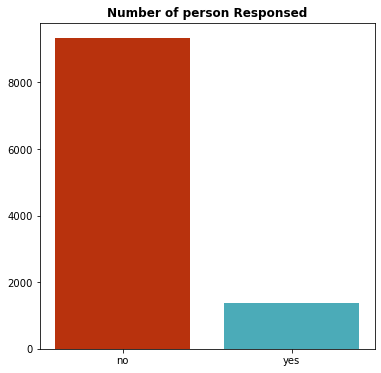

In [99]:
# create figure and axes
plt.subplots(figsize = (6,6))
plt.title('Number of person Responsed', fontweight='bold')
plt.bar(responsed.index, responsed, color=('#b8320d','#4babb8'))

In [12]:
sales_channel_response = ica_df.groupby(['response','sales_channel'])['income'].count().reset_index()
sales_channel_response

,response,sales_channel,income
0,no,agent,3339
1,no,branch,2666
2,no,call center,1895
3,no,web,1428
4,yes,agent,680
5,yes,branch,309
6,yes,call center,204
7,yes,web,168


<AxesSubplot:title={'center':'sales_channel_response'}, xlabel='sales_channel', ylabel='income'>

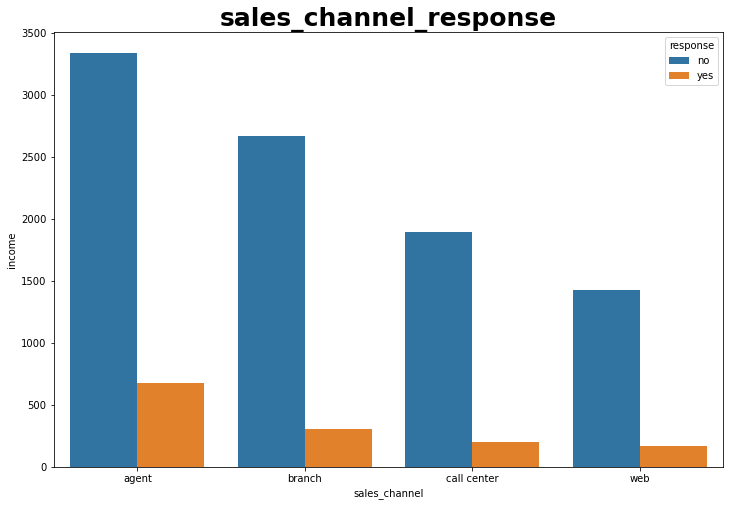

In [13]:
plt.subplots(figsize = (12,8))
plt.title('sales_channel_response', size='25', fontweight='bold')

sns.barplot(x = sales_channel_response['sales_channel'],y = sales_channel_response['income'], hue = sales_channel_response['response'])

In [57]:
labels = ['low', 'higher low', 'medium', 'medium high', 'high']
ica_binned = pd.DataFrame(pd.cut(ica_df['total_claim_amount'], bins=5, labels = labels))
ica_binned

,total_claim_amount
0,low
1,higher low
2,low
3,low
4,higher low
...,...
10684,medium
10685,low
10686,low
10687,higher low


<AxesSubplot:xlabel='total_claim_amount', ylabel='count'>

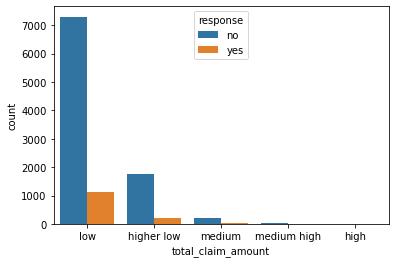

In [51]:
sns.countplot(x= ica_binned['total_claim_amount'], hue= ica_df["response"])

In [35]:
labels = ['low', 'higher low', 'medium', 'medium high', 'high']
bins = [(-2.893, 578.6) , (578.6, 1157.2) , (1157.2, 1735.8) , (1735.8, 2314.4) , (2314.4, 2893.0)]
df = pd.DataFrame({'bins': bins, 'label': labels})
df

,bins,label
0,"(-2.893, 578.6)",low
1,"(578.6, 1157.2)",higher low
2,"(1157.2, 1735.8)",medium
3,"(1735.8, 2314.4)",medium high
4,"(2314.4, 2893.0)",high


In [82]:
binned = pd.cut(ica_df['income'], bins=5)
binned

0         (46014.6, 64003.4]
1        (9947.056, 28025.8]
2        (9947.056, 28025.8]
3         (46014.6, 64003.4]
4        (9947.056, 28025.8]
                ...         
10684     (64003.4, 81992.2]
10685     (46014.6, 64003.4]
10686     (28025.8, 46014.6]
10687     (64003.4, 81992.2]
10688     (81992.2, 99981.0]
Name: income, Length: 10689, dtype: category
Categories (5, interval[float64, right]): [(9947.056, 28025.8] < (28025.8, 46014.6] < (46014.6, 64003.4] < (64003.4, 81992.2] < (81992.2, 99981.0]]

In [83]:
bins = [(9947.056, 28025.8) , (28025.8, 46014.6) , (46014.6, 64003.4) , (64003.4, 81992.2) , (81992.2, 99981.0)]
df = pd.DataFrame({'bins': bins, 'label': labels})
df

,bins,label
0,"(9947.056, 28025.8)",low
1,"(28025.8, 46014.6)",higher low
2,"(46014.6, 64003.4)",medium
3,"(64003.4, 81992.2)",medium high
4,"(81992.2, 99981.0)",high


In [86]:
ica_binned = pd.DataFrame(pd.cut(ica_df['income'], bins=5, labels = labels))
ica_binned

,income
0,medium
1,low
2,low
3,medium
4,low
...,...
10684,medium high
10685,medium
10686,higher low
10687,medium high


ica_binned = pd.DataFrame(pd.cut(ica_df['income'], bins=5))
ica_binned

<AxesSubplot:xlabel='income', ylabel='count'>

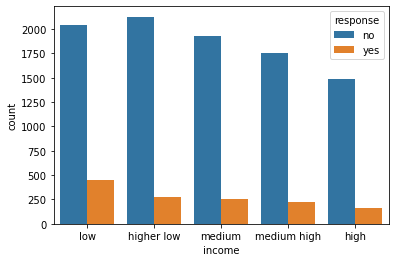

In [87]:
sns.countplot(x= ica_binned['income'], hue= ica_df["response"])

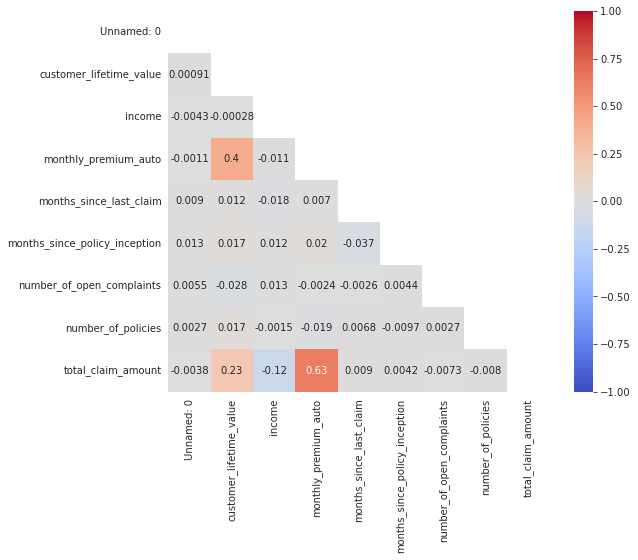

In [9]:
corr = ica_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [ ]:
nception	number_of_open_complaints	number_of_policies	policy_type	policy	renew_offer_type	
sales_channel	total_claim_amount	vehicle_class	vehicle_size

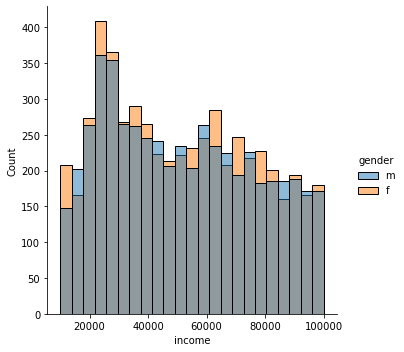

In [128]:
sns.displot(ica_df, x="income", hue="gender")

In [121]:
plotdata['total_claim_amount'].plot(kind="barh")
plt.title("total_claim_amount")
plt.ylabel("Family Member")
plt.xlabel("Pies Consumed")

NameError: name 'plotdata' is not defined

In [ ]:
df = pd.DataFrame({
    'Name': ['John', 'Sammy', 'Joe'],
    'Age': [45, 38, 90],
    'Height(in cm)': [150, 180, 160]
})
  
# plotting Height
ax = df.plot(x="Name", y="Height(in cm)", kind="bar")
# plotting age on the same axis
df.plot(x="Name", y="Age", kind="bar", ax=ax, color="maroon")